In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *
from itertools import islice
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [56]:
data = pd.read_excel("TNT Case Data.xls", sheet_name = "AP_Masked Data")

In [57]:
data.shape

(29586, 33)

In [58]:
data.head()

C.candidateId  Der.Age C.personalDetails.gender C.personalDetails.religion  \
0              1       20                     MALE                      Hindu   
1              2       18                     MALE                      Hindu   
2              3       20                     MALE                      Hindu   
3              4       22                     MALE                      Hindu   
4              5       22                     MALE                      Hindu   

  C.personalDetails.caste C.personalDetails.differentlyAbled  \
0                      ST                                 NO   
1                      SC                                 NO   
2                 General                                 NO   
3                     OBC                                 NO   
4                     OBC                                 NO   

  C.sourceOfMobilization.source C.personalDetails.maritialStatus  \
0             Self Registration                        Unmarried   
1             Self Registration                        Unmarried   
2             Self Registration                        Unmarried   
3             Self Registration                        Unmarried   
4             Self Registration                        Unmarried   

  C.contactDetails.district ExpD.employedStatus C.PreTrainingStatus  \
0            visakhapatanam                  No             Fresher   
1                  cuddapah                  No             Fresher   
2                  cuddapah                  No             Fresher   
3                  cuddapah                  No             Fresher   
4                  cuddapah                  No             Fresher   

   Der.Experience EduD.education C.TechnicalEducation  B.batchId  \
0               0            SSC                   No      16976   
1               0            SSC                   No        798   
2               0            ITI                   No        798   
3               0            SSC                   No        798   
4               0        Diploma                   No        798   

  B.batchStartDate B.schemeName B.schemeId           B.sector.name    B.tpId  \
0       2019-07-19    Scheme -2   Scheme_8           Capital Goods   TP10151   
1       2018-11-12    Scheme -9          1  Electronics & Hardware  TP_16827   
2       2018-11-12    Scheme -9          1  Electronics & Hardware  TP_16827   
3       2018-11-12    Scheme -9          1  Electronics & Hardware  TP_16827   
4       2018-11-12    Scheme -9          1  Electronics & Hardware  TP_16827   

   B.TCName B.batchName B.address.district.name  B.batchfees  \
0   TP10151   Batch-122           Visakhapatnam            0   
1  TP_16827   Batch-132                Cuddapah            0   
2  TP_16827   Batch-132                Cuddapah            0   
3  TP_16827   Batch-132                Cuddapah            0   
4  TP_16827   Batch-132                Cuddapah            0   

                                         AJD.jobName  AJD.nsqfLevel  \
0  Manual Metal Arc Welding/ Shielded Metal Arc W...            3.0   
1                        Computer Hardware Assistant            3.0   
2                        Computer Hardware Assistant            3.0   
3                        Computer Hardware Assistant            3.0   
4                        Computer Hardware Assistant            3.0   

  AJD.qpCode QPS.qpParamOne.paramDesc QPS.qpParamThree.paramDesc  \
0     QP-756                technical                  organized   
1    QP-1430            non-technical                unorganized   
2    QP-1430            non-technical                unorganized   
3    QP-1430            non-technical                unorganized   
4    QP-1430            non-technical                unorganized   

  QPS.qpParamTwo.paramDesc  AJD.assmtCrt.percentage AJD.assmtCrt.result  \
0            manufacturing                    82.75                PASS   
1            manufacturing        

In [59]:
data.columns

Index(['C.candidateId', 'Der.Age', 'C.personalDetails.gender',
       'C.personalDetails.religion', 'C.personalDetails.caste',
       'C.personalDetails.differentlyAbled', 'C.sourceOfMobilization.source',
       'C.personalDetails.maritialStatus', 'C.contactDetails.district',
       'ExpD.employedStatus', 'C.PreTrainingStatus', 'Der.Experience',
       'EduD.education', 'C.TechnicalEducation', 'B.batchId',
       'B.batchStartDate', 'B.schemeName', 'B.schemeId', 'B.sector.name',
       'B.tpId', 'B.TCName', 'B.batchName', 'B.address.district.name',
       'B.batchfees', 'AJD.jobName', 'AJD.nsqfLevel', 'AJD.qpCode',
       'QPS.qpParamOne.paramDesc', 'QPS.qpParamThree.paramDesc',
       'QPS.qpParamTwo.paramDesc', 'AJD.assmtCrt.percentage',
       'AJD.assmtCrt.result', 'Der.CandidateFromAndra'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29586 entries, 0 to 29585
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   C.candidateId                       29586 non-null  int64         
 1   Der.Age                             29586 non-null  int64         
 2   C.personalDetails.gender            29586 non-null  object        
 3   C.personalDetails.religion          29583 non-null  object        
 4   C.personalDetails.caste             29583 non-null  object        
 5   C.personalDetails.differentlyAbled  29586 non-null  object        
 6   C.sourceOfMobilization.source       19753 non-null  object        
 7   C.personalDetails.maritialStatus    29586 non-null  object        
 8   C.contactDetails.district           18733 non-null  object        
 9   ExpD.employedStatus                 29586 non-null  object        
 10  C.PreTrainingStatus   

## 1. Use a boxplot to show the distribution of assessment scores per training provider ("B.tpId" represent the training provider id and  "AJD.assmtCrt.percentage"  represents the assessment score).

In [61]:
data['AJD.assmtCrt.percentage'].median()

78.44

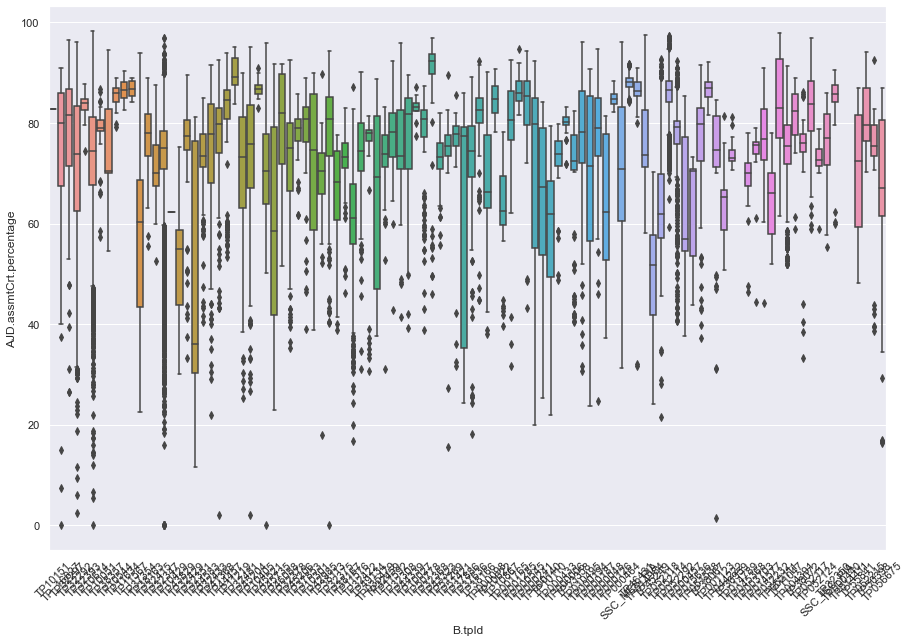

In [62]:
sns.set(rc={'figure.figsize':(15,10)})
box = sns.boxplot(data = data, x = 'B.tpId', y = 'AJD.assmtCrt.percentage')
plt.xticks(rotation=45)
plt.show()

The overall median of the assesment percentage lies around 78.44 for all the trainers for all the candidates in the database

## 2. Use a stacked bar plot to show the number of FAIL/PASS per training provider ("AJD.assmtCrt.result" represents the assessment status which is populated by FAIL/PASS)

In [63]:
data_pass_fail = pd.DataFrame(data.groupby(['B.tpId','AJD.assmtCrt.result'])['AJD.assmtCrt.result'].count().unstack().fillna(0))
data_pass_fail = data_pass_fail.reset_index()

<AxesSubplot:xlabel='B.tpId'>

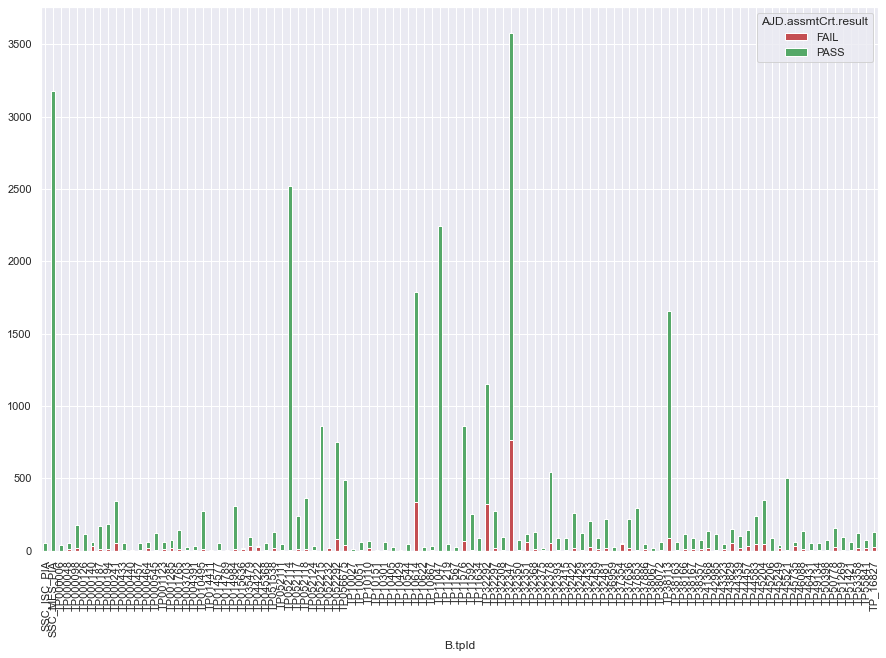

In [64]:
data_pass_fail.set_index('B.tpId').plot(kind='bar', stacked=True, color=["r","g"])

In [65]:
data_pass_fail2 = data_pass_fail.sort_values(by = ['PASS','FAIL'], ascending = False).head(20)

<AxesSubplot:xlabel='B.tpId'>

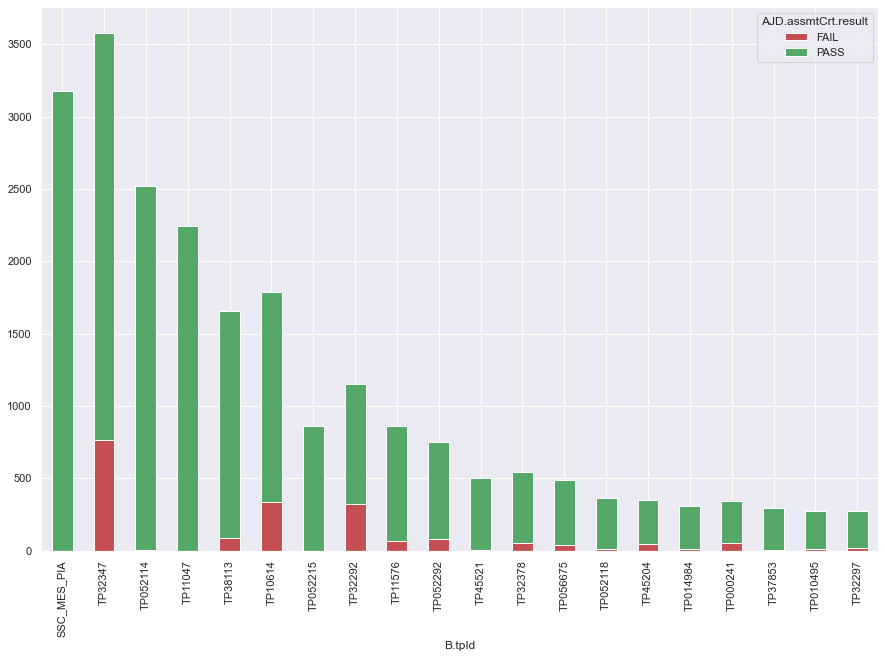

In [66]:
data_pass_fail2.set_index('B.tpId').plot(kind='bar', stacked=True, color=["r","g"])

The dataframe is sorted by the top 20 trainers who have shown highest amount of pass percentages. We see that when we sort the data based on the pass % we find that the SSC_MES_PIA trainer opes the list with more pass candidates

## 3. Count the number of unique "B.sector.name", "B.address.district.name", "B.batchName", and "C.candidateId" per training provider.

In [67]:
trainer_count = data.groupby('B.tpId')['B.sector.name','B.address.district.name','B.batchName','C.candidateId'].nunique().reset_index()
trainer_count2 = trainer_count.sort_values(by = ['B.sector.name', 'B.address.district.name', 'B.batchName', 'C.candidateId'], ascending = False)

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_61805/2327570179.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trainer_count = data.groupby('B.tpId')['B.sector.name','B.address.district.name','B.batchName','C.candidateId'].nunique().reset_index()


In [68]:
trainer_count2

B.tpId  B.sector.name  B.address.district.name  B.batchName  \
47       TP10614             10                        1           85   
56       TP32292              6                        4           38   
64       TP32378              5                        4           17   
74       TP37636              5                        3            7   
20      TP010495              4                        4           10   
7       TP000187              3                        5            6   
91       TP45204              3                        4           13   
14      TP000545              3                        3            5   
9       TP000241              3                        2           13   
69       TP32433              3                        1            7   
84       TP41368              3                        1            6   
17      TP001765              3                        1            5   
38      TP056675              2                        7           16   
53       TP11576              2                        6           36   
81       TP38166              2                        4            3   
57       TP32297              2                        2            9   
67       TP32422              2                        2            9   
75       TP37853              2                        2            8   
8       TP000194              2                        2            7   
16      TP001285              2                        2            4   
40       TP10051              2                        2            2   
43       TP10301              2                        2            2   
13      TP000464              2                        2            2   
3       TP000048              2                        2            2   
90       TP44583              2                        1            8   
4       TP000098              2                        1            6   
85       TP42985              2                        1            6   
87       TP43829              2                        1            5   
89       TP44457              2                        1            5   
96       TP46088              2                        1            5   
61       TP32351              2                        1            4   
26      TP035479              2                        1            3   
82       TP38167              2                        1            3   
83       TP38357              2                        1            3   
105     TP_16827              2                        1            2   
95       TP45735              2                        1            2   
6       TP000140              2                        1            2   
59       TP32347              1                       13          126   
33      TP052118              1                        7           13   
50       TP11047              1                        6           46   
41       TP10110              1                        5            5   
37      TP052292              1                        4           23   
1    SSC_MES_PIA              1                        3           60   
31      TP052114              1                        3           54   
29      TP051538              1                        3            6   
76       TP37886              1                        3            3   
79       TP38113              1                        2           31   
73       TP37354              1                        2            3   
12      TP000457              1                        2            2   
10      TP000433              1                        2            2   
35      TP052215              1                        1           21   
94       TP45521              1                        1           16   
24      TP014984              1                        1            9   
71       TP32481              1                        1            

In [69]:
#Getting the top 20 trainers based on the sector name, district name and just plotting in graph
trainer_count3 = trainer_count2.head(20)

<AxesSubplot:xlabel='B.tpId'>

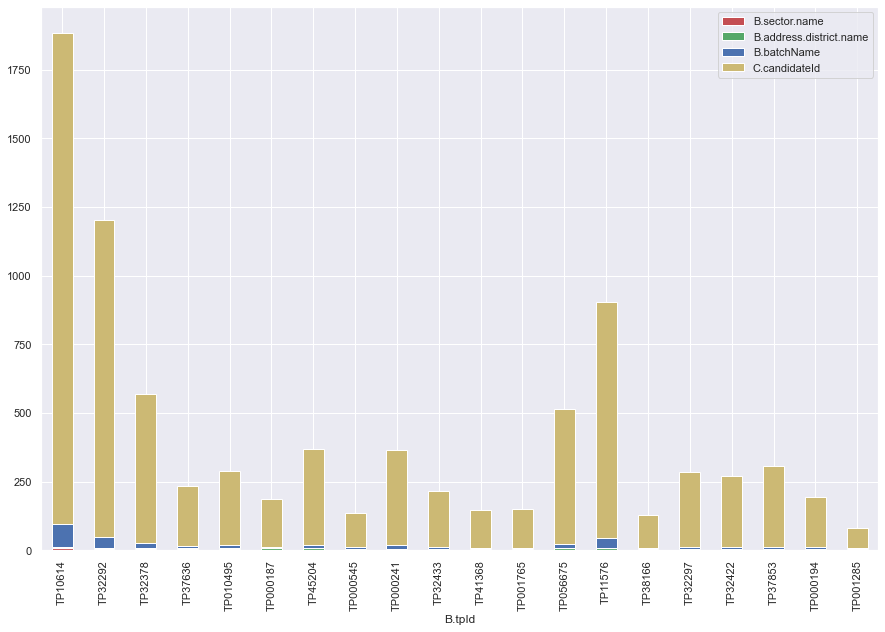

In [70]:
trainer_count3.set_index('B.tpId').plot(kind='bar', stacked=True, color=["r","g","b","y"])

This is one additional representation of the trainers sorted on the basis of sector name, districtname, batch name, and candidate id

## 4. Calculate the median of assessment score and percentage of candidates who pass the assessment test per training provider.  

In [71]:
data_perc = data[['B.tpId', 'AJD.assmtCrt.percentage', 'AJD.assmtCrt.result']]

In [72]:
data_perc_2 = pd.DataFrame(data_perc.groupby('B.tpId')['AJD.assmtCrt.percentage'].median().fillna(0).reset_index())

In [73]:
data_pass_fail['Pass_percent'] = data_pass_fail['PASS']/(data_pass_fail['PASS'] + data_pass_fail['FAIL'])

In [74]:
tpid_pass_median = pd.concat([data_perc_2,data_pass_fail], keys = 'B.tpId', axis = 1, ignore_index = True)
tpid_pass_median = tpid_pass_median[[0,1,5]]
tpid_pass_median.columns = ['TP_id','Median_percentage','Pass_percentage']

In [75]:
tpid_pass_median.sort_values(by = ['Pass_percentage', 'Median_percentage'], ascending = False)

TP_id  Median_percentage  Pass_percentage
51       TP11219             89.200         1.000000
1    SSC_MES_PIA             88.050         1.000000
77       TP38067             86.990         1.000000
52       TP11567             86.750         1.000000
44       TP10405             86.670         1.000000
55       TP11634             86.530         1.000000
46       TP10544             86.000         1.000000
48       TP10622             84.845         1.000000
5       TP000126             84.750         1.000000
39       TP10027             83.095         1.000000
42       TP10151             82.750         1.000000
2       TP000006             80.200         1.000000
35      TP052215             79.570         1.000000
92       TP45206             79.000         1.000000
0    SSC_ISC_PIA             76.955         1.000000
50       TP11047             75.420         1.000000
72       TP36959             73.090         1.000000
31      TP052114             86.460         0.998809
94       TP45521             70.420         0.989980
65       TP32393             84.000         0.988372
54       TP11592             78.100         0.984252
22      TP014577             76.845         0.980000
101      TP51269             75.500         0.978723
66       TP32415             70.000         0.977273
75       TP37853             80.750         0.976431
14      TP000545             85.430         0.976000
33      TP052118             61.900         0.966759
40       TP10051             79.040         0.966667
34      TP052124             72.720         0.966667
80       TP38163             78.000         0.966102
28      TP045368             70.000         0.962264
97       TP46431             86.385         0.960000
60       TP32350             85.780         0.957143
24      TP014984             73.700         0.954693
32      TP052117             83.740         0.954167
20      TP010495             78.125         0.952206
68       TP32429             77.440         0.951220
43       TP10301             74.585         0.950000
7       TP000187             78.910         0.947977
79       TP38113             80.750         0.945718
17      TP001765             80.560         0.944056
67       TP32422             74.330         0.941634
57       TP32297             81.500         0.941392
85       TP42985             70.370         0.940171
30      TP052111             83.030         0.936170
102      TP51421             77.750         0.935484
58       TP32308             73.400         0.935484
78       TP38072             76.000         0.932203
19      TP004391             82.360         0.931034
62       TP32368             92.400         0.930769
8       TP000194             71.500         0.928962
18      TP003703             75.520         0.925926
53       TP11576             61.000         0.920930
99       TP50398             75.500         0.914286
38      TP056675             67.050         0.913934
4       TP000098             66.250         0.910615
74       TP37636             74.510         0.909502
71       TP32481             73.310         0.908676
81       TP38166             82.580         0.906780
96       TP46088             82.000         0.905797
64       TP32378             75.000         0.904236
37      TP052292             79.270         0.895861
69       TP32433             77.720         0.893204
12      TP000457             56.935         0.888889
82       TP38167             73.250         0.887640
10      TP000433             73.860         0.882353
29      TP051538             79.700         0.881890
98       TP49134             78.000         0.870370
84       TP41368             79.820         0.868613
91       TP45204             75.875         0.862857
15      TP001123             74.560         0.862069
103      TP53358             72.500         0.850000
9       TP000241             79.750         0.846821
70       TP32459             73.910         0.845238
100      TP50778             80.750 

For each trainer, the median pass assessment scores and the percentage of people who passed are taken and then sorted inthe respective order

## 5. Use the result of question 3 as inputs (4 inputs) and question 4 as outputs (2 outputs) of DEA model parameters. Solve the linear optimization problems per training provider given the set of inputs and output. 

In [76]:
trainer_count2.rename(columns = {'B.tpId' : 'TP_id', 'B.sector.name' :'Sector_name', "B.batchName":"batch_name",
                                "C.candidateId":"candidate_id", "B.address.district.name": "district_name"}, inplace = True)

In [77]:
trainer_list = list(trainer_count2['TP_id'].unique())

In [78]:
optim_df = pd.merge(tpid_pass_median,trainer_count2, on='TP_id').set_index('TP_id').fillna(0)
optim_df.rename(columns = {'Median_percentage':'x5', 'Pass_percentage':'x6','Sector_name':'x1', 'district_name':'x2',
       'batch_name':'x3', 'candidate_id' :'x4'}, inplace = True)
optim_df2 = optim_df.transpose()
inputs = optim_df2.to_dict()

In [79]:
hosts = []
perfs = []
from pulp import *

performance=dict()

# decision variables
output_Ingredients=['x5','x6']
input_Ingredients=['x1','x2','x3','x4']


output_vars = LpVariable.dicts("O", output_Ingredients, 0)
input_vars = LpVariable.dicts("I", input_Ingredients, 0)

for host in trainer_list:
    prob = LpProblem("Branch Utilization Probelm Problem", LpMaximize)

    #Objective 
    prob += (
        lpSum([inputs[host][i] * output_vars[i] for i in output_Ingredients]),
        "Utilization of Branch 1",
    )


    for h in trainer_list:
        prob += (
            lpSum([inputs[h][i] * output_vars[i] for i in output_Ingredients]+[-inputs[h][i] * input_vars[i] for i in input_Ingredients ]) <= 0,
            "{}".format(h)
        )

    #Constraints
    prob += lpSum([inputs[host][i] * input_vars[i] for i in input_Ingredients]) == 1, "Norm"        

    print("_____________________LP- Branch: {}_____________________".format(host))    

    prob.writeLP("DEA_Branch.{}_Model.lp".format(h))


    print("______________________Solution_________________________")

    prob.solve()
    print("Status:", LpStatus[prob.status])
    

    for v in prob.variables():
        print(v.name, "=", v.varValue)
    
    hosts.append(host)
    perfs.append(value(prob.objective))
    trainer_perf = {'tpId': hosts,'Perf': perfs}

    print("Optimal Utilization of Branch {} = ".format(host), value(prob.objective))

    print("__________________________ Dual Variables _______________")

    for name, c in list(prob.constraints.items()):
        print(name, ":", "\t Dual:", c.pi  )

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


_____________________LP- Branch: TP10614_____________________
______________________Solution_________________________
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/572ae8f0a9ca46acbbcd318ec720044f-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/572ae8f0a9ca46acbbcd318ec720044f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 112 COLUMNS
At line 747 RHS
At line 855 BOUNDS
At line 856 ENDATA
Problem MODEL has 107 rows, 6 columns and 632 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 104 (-3) rows, 6 (0) columns and 620 (-12) elements
0  Obj -0 Primal inf 0.00055797149 (1) Dual inf 1450.397 (2)
11  Obj 0.82666294
Optimal - objective value 0.82666294
After P

In [80]:
perf_df  = pd.DataFrame(trainer_perf)
perf_df.sort_values(by = 'Perf', ascending = False).head(20)

tpId      Perf
94       TP11567  1.000000
64       TP11634  1.000000
50      TP052215  1.000000
80       TP10544  1.000000
86       TP11219  1.000000
87      TP000006  1.000000
39       TP11047  1.000000
68       TP45206  1.000000
42   SSC_MES_PIA  1.000000
84   SSC_ISC_PIA  1.000000
60      TP000126  1.000000
93       TP10405  1.000000
95       TP36959  1.000000
96       TP10622  1.000000
100      TP10027  1.000000
57       TP32368  1.000000
104      TP10151  1.000000
82       TP38067  1.000000
43      TP052114  0.998809
51       TP45521  0.989980

The model reveals us the performance of each trainer based on the inputs and the outputs fed to it, which can be seen from the dataframe printed above

## 6. Based on the results, identify low and top-efficient training providers. 

In [81]:
perf_df['Eff_flag'] = np.where(perf_df['Perf']>=0.9, 'Efficient', 'Inefficient')

In [82]:
perf_df[perf_df['Eff_flag'] == 'Efficient'].count()

tpId        48
Perf        48
Eff_flag    48
dtype: int64

In [83]:
48/106

0.4528301886792453

We have put a cap of 90% as a performance indicator to filter the trainers where the performance is 90%. With this wee see that out of the 106 trainers only 48 seem to achieve the best output overall, which is 45% of the total trainers.

## 7. Based on the DEA results, identify different approaches that can be deployed to make the skilling ecosystem more efficient. 

From our analysis, we identify that 55% of the total trainers are inefficient.

For these 55% of the trainers, we need to make sure that we train them necessarily. Some of the measures we can take some of the initiatives such as -

    1. We need to monitor the classes conducted by these professors and then understand the flaws potentially notable inthese trainer classes
    
    2. In addition, we can compare the profiles of the candidates who participate in the lecture category with a successful trainer and these two trainers take either the similar courses or the similar courses from the same category
    
    3. Moreover, we can see that QPS.qpParamOne.paramDesc, QPS.qpParamTwo.paramDesc, and QPS.qpParamThree.paramDesc denote the cateogry of the course we can use in our optimization to gain more reasonable insights
    
    4. Jobname denotes the name of the which the candidate is trained, and NsqfLevel denotes the national skills qualification level as well which we can use in our analysis to identify the level and identify if the dropouts is specific to the skill level and we can target those category course more specifically. The same could be achieved using the pre training status, age, gender, candidate from home state,  and the employed status to get course level insights further.
    
    5. For the efficient and inefficient trainers, we can analyse the number of candidates enrolled in their course to understand if it is candidate enrollment that can cause the issue for these folks.


# Alternate Approach - For Q5

In [98]:
#Input
sector_num = dict([(i,a) for i,a in zip(trainer_count2['TP_id'],trainer_count2['Sector_name'])])
district_num = dict([(i,a) for i,a in zip(trainer_count2['TP_id'],trainer_count2['district_name'])])
batch_num = dict([(i,a) for i,a in zip(trainer_count2['TP_id'],trainer_count2['batch_name'])])
candidate_num = dict([(i,a) for i,a in zip(trainer_count2['TP_id'],trainer_count2['candidate_id'])])

#Output
median_score_num = dict([(i,a) for i,a in zip(tpid_pass_median['TP_id'],tpid_pass_median['Median_percentage'])])
pass_percent_num = dict([(i,a) for i,a in zip(tpid_pass_median['TP_id'],tpid_pass_median['Pass_percentage'])])

### Decision Variable

In [99]:
prob = pulp.LpProblem("Trainer_Resource_utilization_probelm", sense = LpMaximize)

### Defining Decision Variable

In [100]:
#Inputs
x1 = pulp.LpVariable.dict("sector",trainer_list, lowBound=0, upBound=None, cat = 'Continuous')
x2 = pulp.LpVariable.dict("district",trainer_list, lowBound=0, upBound=None, cat = 'Continuous')
x3 = pulp.LpVariable.dict("batch",trainer_list,lowBound=0, upBound=None, cat = 'Continuous')
x4 = pulp.LpVariable.dict("candidate",trainer_list,lowBound=0, upBound=None, cat = 'Continuous')

#Outputs
x5 = pulp.LpVariable.dict("median_score",trainer_list,lowBound=0, upBound=None, cat = 'Continuous')
x6 = pulp.LpVariable.dict("percent_pass",trainer_list,lowBound=0, upBound=None, cat = 'Continuous')

### Objective function and Adding constraints

In [108]:
performance = dict()
#variables = dict()

for i in trainer_list:
    # Objective
    prob += pulp.lpSum(median_score_num[i] * x5[i] + pass_percent_num[i] * x6[i])

    # Constraints
    prob += pulp.lpSum(median_score_num[i] * x5[i] + pass_percent_num[i] *x6[i] - sector_num[i] *x1[i] - district_num[i]*x2[i] - batch_num[i]*x3[i] - candidate_num[i]*x4[i]) <= 0
        
    prob += pulp.lpSum(sector_num[i]*x1[i] + district_num[i]*x2[i] + batch_num[i]*x3[i] + candidate_num[i]*x4[i]) == 1

    print("_____________________LP - Trainer: {}_____________________".format(i))  
    print(prob)    

    #prob.writeLP("DEA_trainer_{}_Model.lp".format(i))


    print("______________________Solution_________________________")

    prob.solve()
    print("Status:", LpStatus[prob.status])
    
    for v in prob.variables():
        variables.update({v.name:v.varValue}) #variables = dict(zip(v.name, v.varValue)) #variables[v.name].append(v.varValue) variables.update({v.name:v.varValue})
    
    for v in prob.variables():
        print(v.name, "=", v.varValue)

    print("Optimal efficiency of trainer {} = ".format(i), pulp.value(prob.objective))

    print("__________________________ Dual Variables _______________")

    for name, c in list(prob.constraints.items()):
        print(name, ":", "\t Dual:", c.pi  )
        
    performance[i]= pulp.value(prob.objective)


_____________________LP - Trainer: TP10614_____________________
Trainer_Resource_utilization_probelm:
MAXIMIZE
74.33*median_score_TP10614 + 0.8138624930128563*percent_pass_TP10614 + 0.0
SUBJECT TO
_C1: - 85 batch_TP10614 - 1789 candidate_TP10614 - district_TP10614
 + 74.33 median_score_TP10614 + 0.813862493013 percent_pass_TP10614
 - 10 sector_TP10614 <= 0

_C2: 85 batch_TP10614 + 1789 candidate_TP10614 + district_TP10614
 + 10 sector_TP10614 = 1

_C3: - 85 batch_TP10614 - 1789 candidate_TP10614 - district_TP10614
 + 74.33 median_score_TP10614 + 0.813862493013 percent_pass_TP10614
 - 10 sector_TP10614 <= 0

_C4: 85 batch_TP10614 + 1789 candidate_TP10614 + district_TP10614
 + 10 sector_TP10614 = 1

_C5: - 85 batch_TP10614 - 1789 candidate_TP10614 - district_TP10614
 + 74.33 median_score_TP10614 + 0.813862493013 percent_pass_TP10614
 - 10 sector_TP10614 <= 0

_C6: 85 batch_TP10614 + 1789 candidate_TP10614 + district_TP10614
 + 10 sector_TP10614 = 1

_C7: - 85 batch_TP10614 - 1789 candida

PulpSolverError: Pulp: Error while executing /Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc

In [109]:
variables

{'batch_TP10614': 0.011764706,
 'candidate_TP10614': 0.0,
 'district_TP10614': 0.0,
 'median_score_TP10614': 0.0,
 'percent_pass_TP10614': 0.0,
 'sector_TP10614': 0.0,
 'batch_TP32292': 0.026315789,
 'candidate_TP32292': 0.0,
 'district_TP32292': 0.0,
 'median_score_TP32292': 0.0,
 'percent_pass_TP32292': 0.0,
 'sector_TP32292': 0.0,
 'batch_TP32378': 0.058823529,
 'candidate_TP32378': 0.0,
 'district_TP32378': 0.0,
 'median_score_TP32378': 0.0,
 'percent_pass_TP32378': 0.0,
 'sector_TP32378': 0.0,
 'batch_TP37636': 0.14285714,
 'candidate_TP37636': 0.0,
 'district_TP37636': 0.0,
 'median_score_TP37636': 0.0,
 'percent_pass_TP37636': 0.0,
 'sector_TP37636': 0.0,
 'batch_TP010495': 0.1,
 'candidate_TP010495': 0.0,
 'district_TP010495': 0.0,
 'median_score_TP010495': 0.0,
 'percent_pass_TP010495': 0.0,
 'sector_TP010495': 0.0,
 'batch_TP000187': 0.16666667,
 'candidate_TP000187': 0.0,
 'district_TP000187': 0.0,
 'median_score_TP000187': 0.0,
 'percent_pass_TP000187': 0.0,
 'sector_TP0001

In [110]:
# Print the performance of each trainer
for i in performance.items():
    print(i)

('TP10614', 1.000000007154835)
('TP32292', 0.9999999761904761)
('TP32378', 0.9999999876611418)
('TP37636', 1.0000000113122172)
('TP010495', 1.0000000474264705)
('TP000187', 0.9999999537572254)
('TP45204', 1.0000000022857143)
('TP000545', 1.0000000352)
('TP000241', 1.000000023699422)
('TP32433', 0.9999999844660195)
('TP41368', 0.9999999963503651)
('TP001765', 1.0000000384615384)
('TP056675', 0.9999999967213116)
('TP11576', 1.0000000130232558)
('TP38166', 0.9999999652542373)
('TP32297', 0.9999999912087911)
('TP32422', 1.0000000272373541)
('TP37853', 0.9999999696969696)
('TP000194', 1.0000000109289617)
('TP001285', 1.000000002)
('TP10051', 1.00000004)
('TP10301', 1.0000000199999999)
('TP000464', 0.9999999830508474)
('TP000048', 0.999999979245283)
('TP44583', 0.9999999904166665)
('TP000098', 0.9999999916201117)
('TP42985', 1.0000000341880342)
('TP43829', 0.9999999834437086)
('TP44457', 0.9999999616438356)
('TP46088', 1.0000000000000002)
('TP32351', 1.0000000132743363)
('TP035479', 1.000000

In [ ]:
variables = dict([(i,a) for i,a in zip(keys,value)])

In [ ]:
inc = iter(variables.items())
batch = dict(islice(inc, len(variables) // 6))
rest1 = dict(inc)

inc2 = iter(rest1.items())
candidate = dict(islice(inc2, len(rest1) // 5))
rest2 = dict(inc2)

inc3 = iter(rest2.items())
district = dict(islice(inc3, len(rest2) // 4))
rest3 = dict(inc3)

inc4 = iter(rest3.items())
median_score = dict(islice(inc4, len(rest3) // 3))
rest4 = dict(inc4)

inc5 = iter(rest4.items())
percent_pass = dict(islice(inc5, len(rest4) // 2))
sector = dict(inc5)

In [ ]:
df_results = pd.DataFrame(pd.concat({'batch':pd.Series(batch),'candidate':pd.Series(candidate),
             'district':pd.Series(district),'median_score':pd.Series(median_score),
             'percent_pass':pd.Series(percent_pass), 'sector': pd.Series(sector)}, axis = 0).reset_index())
df_results.columns = ['Var','ID','perf']

In [ ]:
df_results.head()

Var                 ID      perf
0  batch  batch_SSC_ISC_PIA  0.000000
1  batch  batch_SSC_MES_PIA  0.016667
2  batch     batch_TP000006  0.000000
3  batch     batch_TP000048  0.000000
4  batch     batch_TP000098  0.000000

In [ ]:
bat = df_results[df_results['Var']=='batch']
bat['trainer'] = bat['ID'].str[len('batch')+1:]
can = df_results[df_results['Var']=='candidate']
can['trainer'] = can['ID'].str[len('candidate')+1:]
dis = df_results[df_results['Var']=='district']
dis['trainer'] = dis['ID'].str[len('district')+1:]
med = df_results[df_results['Var']=='median_score']
med['trainer'] = med['ID'].str[len('median_score')+1:]
per = df_results[df_results['Var']=='percent_pass']
per['trainer'] = per['ID'].str[len('percent_pass')+1:]
sec = df_results[df_results['Var']=='sector']
sec['trainer'] = sec['ID'].str[len('sector')+1:]

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_73532/1112316181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat['trainer'] = bat['ID'].str[len('batch')+1:]
/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_73532/1112316181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  can['trainer'] = can['ID'].str[len('candidate')+1:]
/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_73532/1112316181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
a1 = bat.merge(can, on = 'trainer')
a2 = a1.merge(dis, on = 'trainer')
a3 = a2.merge(med, on = 'trainer')
a4 = a3.merge(per, on = 'trainer')
a5 = a4.merge(sec, on = 'trainer')

fin_var = a5.drop(a5.columns[[1,5, 8,11, 14, 17]],axis = 1)
#pd.melt(fin_var, id_vars = ['trainer','level_0'], value_name = 0, value_vars = 0)
fin_var.columns = ['Batch','batch_score','trainer','Candidate','candidate_score','district','district_score', 
                   'median', 'median_score', 'pass_per', 'pass_per_score', 'sector', 'sector_score']
fin_var = fin_var[['trainer', 'batch_score','candidate_score', 'district_score','median_score','pass_per_score','sector_score']]
fin_var.head()

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x', 'Var_x', 'perf_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


trainer  batch_score  candidate_score  district_score  median_score  \
0  SSC_MES_PIA     0.016667         0.000000             0.0      0.000000   
1     TP000006     0.000000         0.024390             0.0      0.012469   
2     TP000048     0.000000         0.018868             0.0      0.000000   
3     TP000098     0.000000         0.000000             0.0      0.000000   
4     TP000126     0.250000         0.000000             0.0      0.000000   

   pass_per_score  sector_score  
0        1.000000           0.0  
1        0.000000           0.0  
2        1.292683           0.0  
3        1.098159           0.5  
4        1.000000           0.0

In [ ]:
fin_var['out_sum'] = fin_var['median_score'] +fin_var['pass_per_score']
fin_var['inp_sum'] = fin_var['batch_score'] +fin_var['candidate_score'] + fin_var['district_score'] +fin_var['sector_score']
fin_var.sort_values(by= 'inp_sum', ascending = False).head()

trainer  batch_score  candidate_score  district_score  median_score  \
94   TP50778          0.0              0.0             0.0      0.012384   
9   TP000433          0.0              0.0             0.0      0.000000   
72   TP38072          0.0              0.0             1.0      0.000000   
62   TP32429          0.0              0.0             1.0      0.012913   
56   TP32368          0.0              0.0             0.0      0.000000   

    pass_per_score  sector_score   out_sum  inp_sum  
94        0.000000           1.0  0.012384      1.0  
9         1.133333           1.0  1.133333      1.0  
72        1.072727           0.0  1.072727      1.0  
62        0.000000           0.0  0.012913      1.0  
56        1.074380           1.0  1.074380      1.0

In [ ]:
batch_key =[]
batch_value =[]
for key, val in zip(keys, value):
    if str(batch) in str(key):
        batch_key.append(key)
        batch_key.append(val)

In [ ]:
print("Total Cost = ", value(prob.objective))

TypeError: 'list' object is not callable

In [ ]:
performance = {}
for v in trainer_list:
    performance[v] = value(prob.objective)

TypeError: 'list' object is not callable

In [ ]:
# Dual Variables
for name, c in list(prob.constraints.items()):
    print(name, ":", c, "\t Dual:", c.pi, "\t Slack:", c.slack)